In [1]:
!pip install diffusers transformers ftfy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 524 kB 4.5 MB/s 
     |████████████████████████████████| 5.8 MB 62.8 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 182 kB 63.2 MB/s 
     |████████████████████████████████| 7.6 MB 58.1 MB/s 


In [2]:
import torch
from torch import autocast
from tqdm.auto import tqdm
from diffusers import StableDiffusionImg2ImgPipeline

In [3]:
model_path = "CompVis/stable-diffusion-v1-4"

In [4]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    revision="fp16", 
    torch_dtype=torch.float16
)
pipe = pipe.to('cuda:0')

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [5]:
# 이미지 다운로드해서 image.jpg로 저장
!wget -O image.jpg https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg

--2022-12-23 12:08:08--  https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178529 (174K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 174.34K  --.-KB/s    in 0.03s   

2022-12-23 12:08:08 (6.66 MB/s) - ‘image.jpg’ saved [178529/178529]



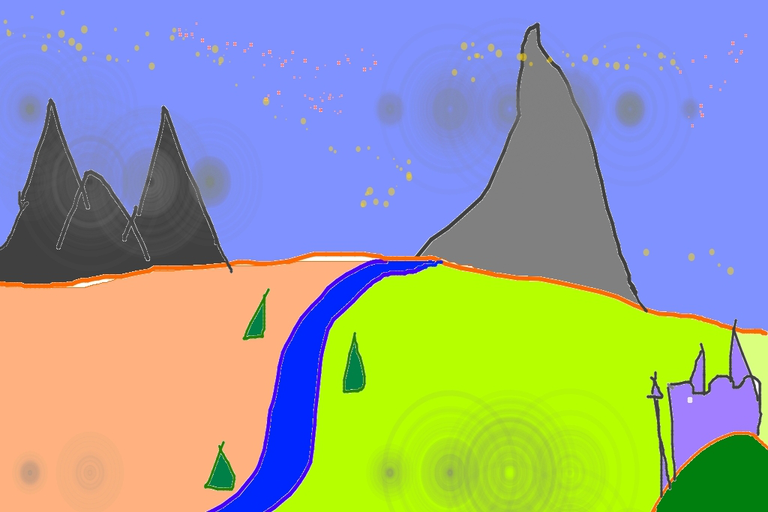

In [6]:
from PIL import Image
init_img = Image.open('image.jpg')
init_img = init_img.resize((768, 512))
init_img

  0%|          | 0/45 [00:00<?, ?it/s]

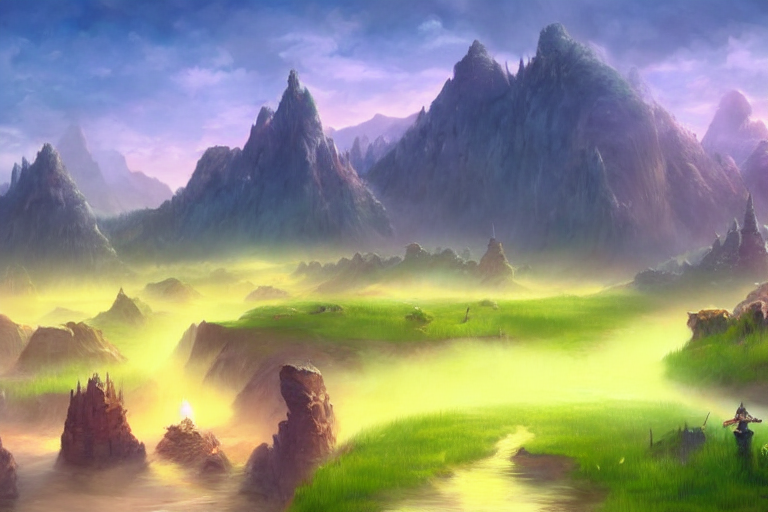

In [13]:
prompt = "A fantasy landscape, trending on artstation"

generator = torch.Generator(device='cuda').manual_seed(1024)

image = pipe(prompt=prompt, init_image=init_img, strength=0.9, guidance_scale=7.5, generator=generator).images[0]

image